In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df=pd.read_csv(r"D:\portfolio_project\corelation_in_python\movies.csv")

In [110]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [111]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Typecasting

In [113]:
df['votes']=df['votes'].astype('Int64')
df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype(float)
df['runtime']=df['runtime'].astype(float)

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget        Int64
gross       float64
company      object
runtime     float64
dtype: object

Handling Duplicates

In [114]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Checking Missing Values

In [115]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [116]:
df.isnull().sum() / df.shape[0] * 100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [117]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Imputig Missing Values

In [118]:
df = df.dropna(subset=['gross'])

# Filling numeric columns with median values
df['budget'].fillna(df['budget'].median(), inplace=True)
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)

# Filling categorical columns with mode (most frequent value)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['released'].fillna(df['released'].mode()[0], inplace=True)
df['writer'].fillna(df['writer'].mode()[0], inplace=True)
df['star'].fillna(df['star'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)


C:\Users\pbari\AppData\Local\Temp\ipykernel_6940\1772731288.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(df['budget'].median(), inplace=True)
C:\Users\pbari\AppData\Local\Temp\ipykernel_6940\1772731288.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [119]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

c:\Users\pbari\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
c:\Users\pbari\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
c:\Users\pbari\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
c:\Users\pbari\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:62: UserWarning: set_ticklabels() shoul

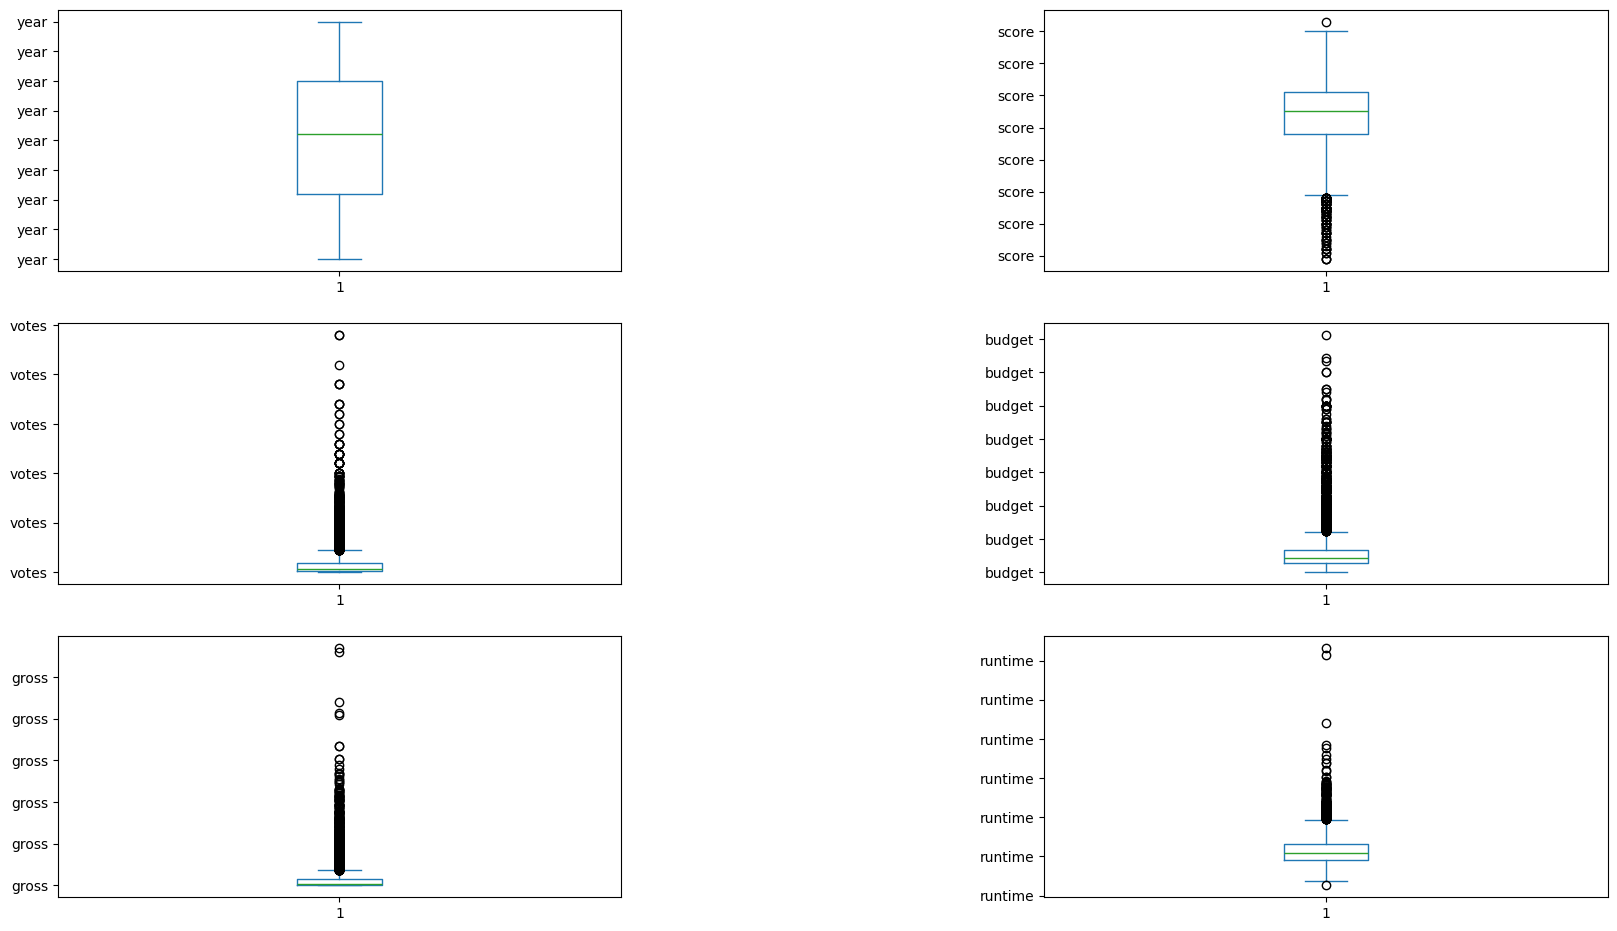

In [120]:
df.plot(kind='box', sharey=False, sharex=False, subplots=True,figsize=(20, 40),layout=[10, 2],vert=0)
plt.subplots_adjust(wspace=0.75)

In [121]:
df[['budget', 'gross', 'votes', 'runtime', 'score']].describe()

,budget,gross,votes,runtime,score
count,7479.0,7.479000e+03,7479.0,7479.000000,7479.000000
mean,31857926.744083,7.850054e+07,90147.322102,107.442439,6.398757
std,36040564.748759,1.657251e+08,164806.814796,18.512087,0.962966
min,6000.0,3.090000e+02,34.0,63.000000,1.900000
25%,14000000.0,4.532056e+06,9900.0,95.000000,5.800000
50%,21000000.0,2.020576e+07,34000.0,104.000000,6.500000
75%,33000000.0,7.601669e+07,96000.0,116.000000,7.100000
max,356000000.0,2.847246e+09,2400000.0,366.000000,9.300000


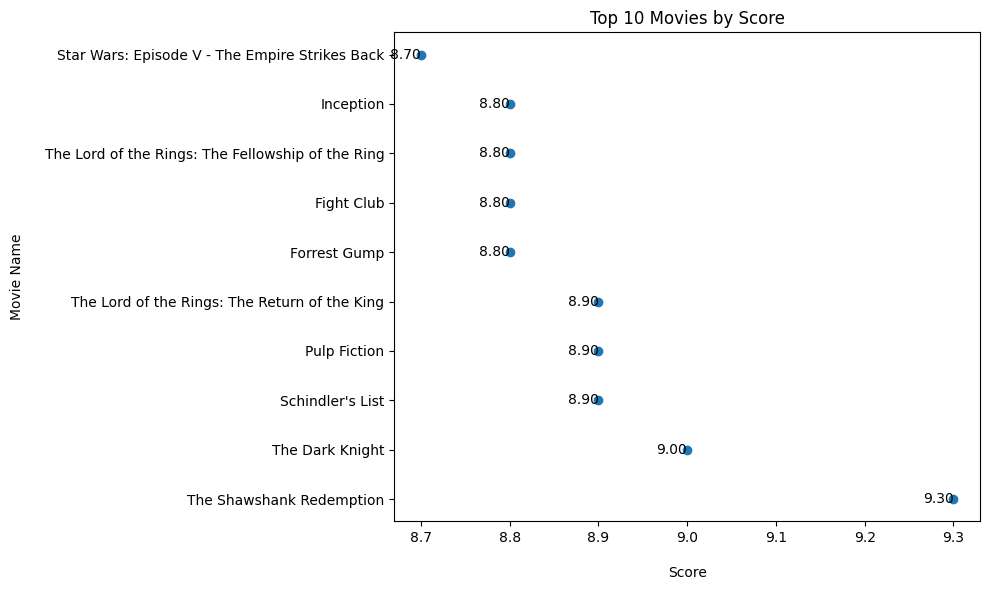

In [122]:
#create analysis for score
movie_score = df["score"].nlargest(10)
top_movies = df.loc[movie_score.index, ["name", "score"]].reset_index(drop=True)
top_movies


# Data
y = top_movies["name"]
x = top_movies["score"]

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title with adjusted padding
plt.xlabel('Score', labelpad=15)  # Adjust the x-axis label position
plt.ylabel('Movie Name', labelpad=15)  # Adjust the y-axis label position
plt.title('Top 10 Movies by Score')

# Add labels to each point
for i in range(len(x)):
    plt.text(x[i], y[i], f'{x[i]:.2f}', va='center', ha='right', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [123]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [124]:
df['yearcorrect']=df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,21000000,3661.0,Prowess Pictures,98.0,Apri
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300,Teng Cheng,Woody Allen,Guangtao Jiang,China,21000000,240663149.0,Beijing Enlight Pictures,110.0,Octo
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000,413378.0,Pryor Entertainment,120.0,June
7657,Leap,R,Drama,2020,"September 25, 2020 (United States)",6.7,903,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,21000000,25818882.0,Universal Pictures,135.0,Sept


In [125]:
df['released'] = df['released'].astype(str)

# Print the first few entries to verify the content
print(df['released'].head())

# Extract the year using a regular expression
df['released_year'] = df['released'].str.extract(r'(\d{4})')

#chech after amend
df.head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,June,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,July,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,June,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,July,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,July,1980


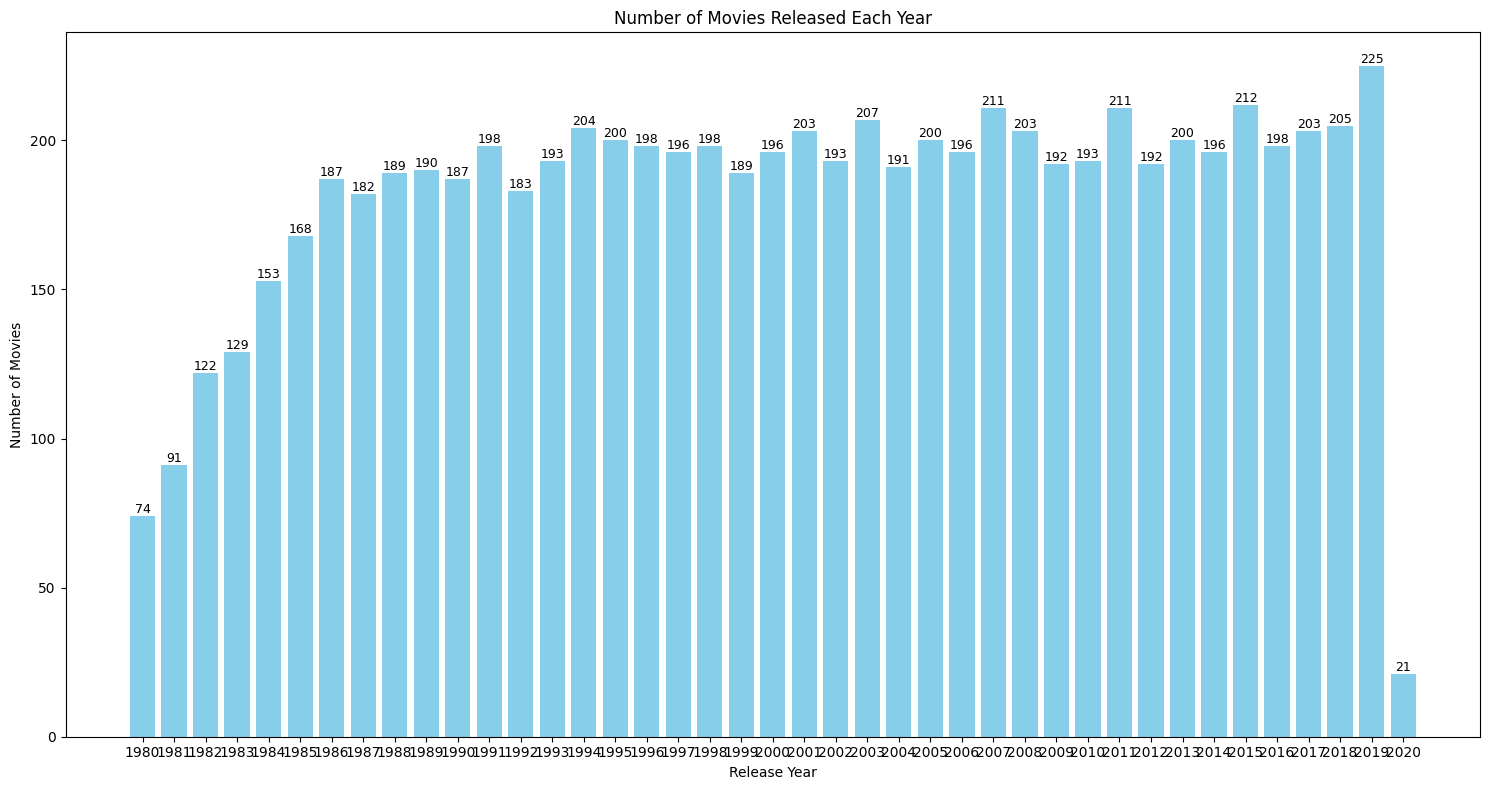

In [126]:
import matplotlib.pyplot as plt

# Count number of movies per release year and sort by year
movie_counts_by_year = df["released_year"].value_counts().sort_index()

# Separate the years and their corresponding movie counts
years = movie_counts_by_year.index
counts = movie_counts_by_year.values

# Create a bar plot
plt.figure(figsize=(15, 8))  # Set the size of the plot
bars = plt.bar(years, counts, color='skyblue')  # Create bars with a color

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=9)

# Make layout neat
plt.tight_layout()

# Show the plot
plt.show()

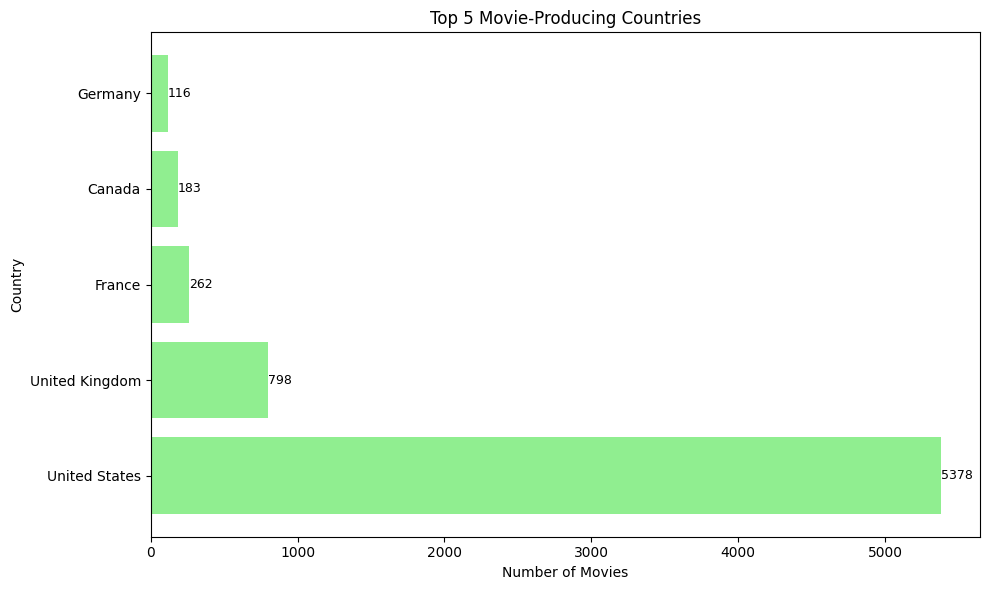

In [127]:
import matplotlib.pyplot as plt

# Get top 5 countries by number of movies
top_countries = df["country"].value_counts().head(5)

# Extract data
countries = top_countries.index
movie_counts = top_countries.values

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(countries, movie_counts, color='lightgreen')

# Add chart labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 5 Movie-Producing Countries')

# Add values on the bars
plt.bar_label(bars, fontsize=9)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()

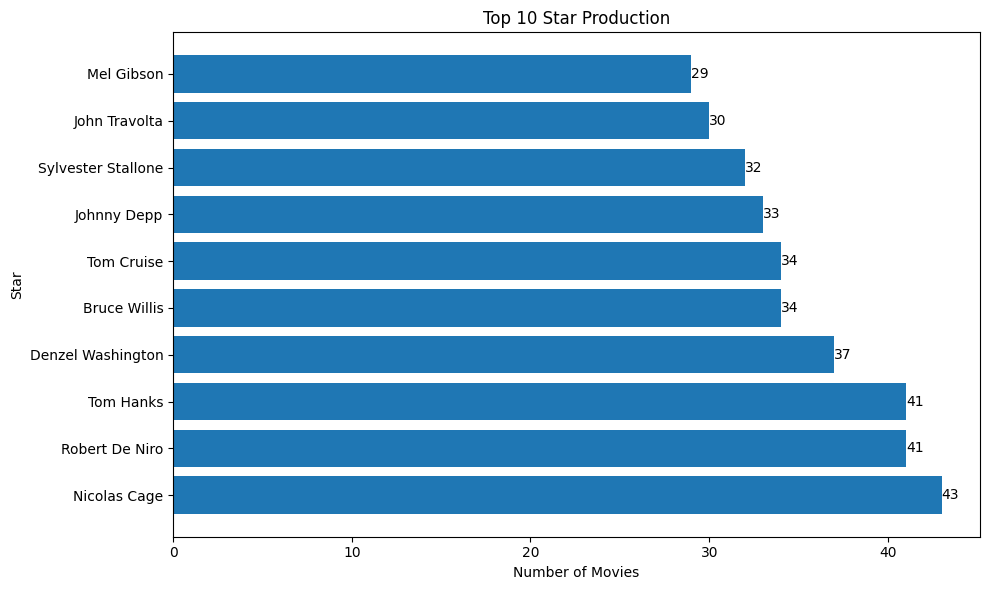

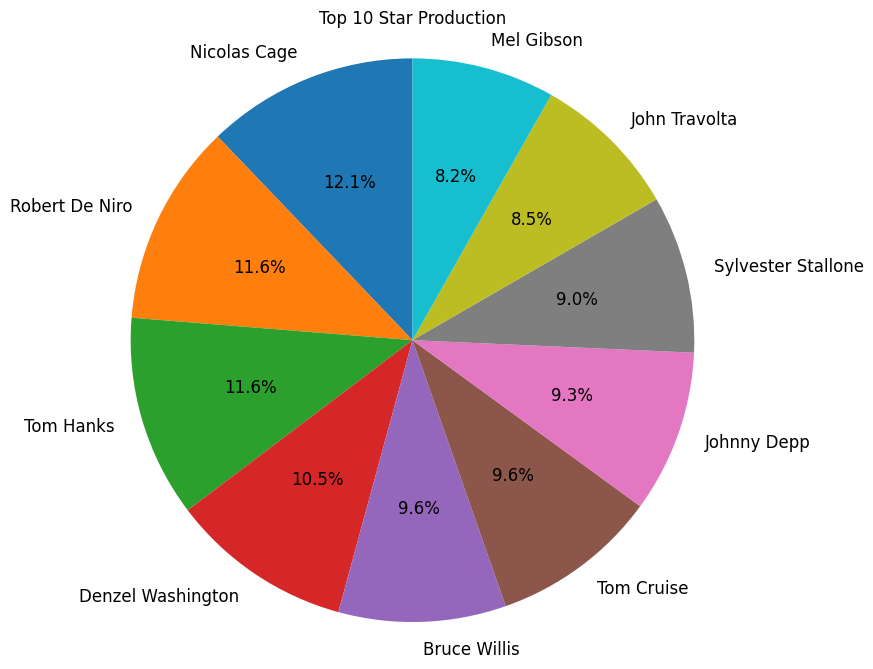

In [128]:
star = df["star"].value_counts().sort_values(ascending=False).head(10)
star.head()

# Data
y = star.index
x = star.values

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
bars = plt.barh(y, x)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Star')
plt.title('Top 10 Star Production')

# Add value labels on each bar
plt.bar_label(bars)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#pie chart

# Data
labels = star.index
sizes = star.values

# Create figure and set size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Add title
plt.title("Top 10 Star Production")

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

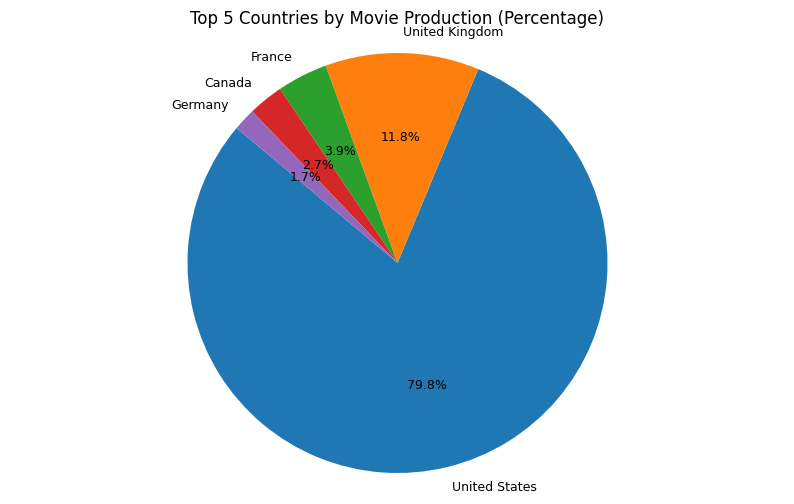

In [129]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(movie_counts, labels=countries, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9})

# Add title
plt.title("Top 5 Countries by Movie Production (Percentage)")

# Make the pie chart a perfect circle
plt.axis('equal')

# Show the plot
plt.show()


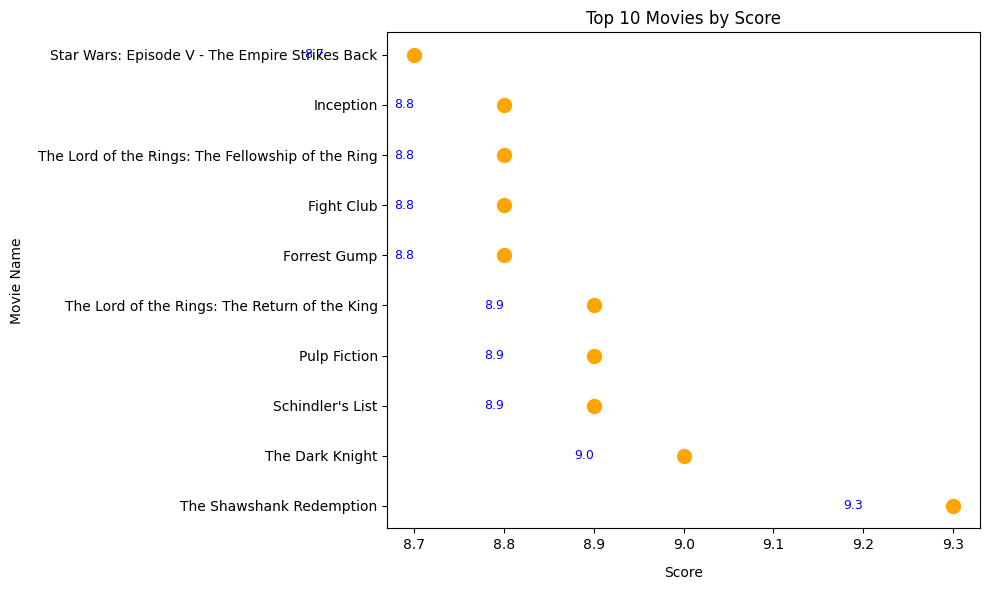

In [130]:
import matplotlib.pyplot as plt

# Get top 10 highest scoring movies
top_scores = df["score"].nlargest(10)
top_movies = df.loc[top_scores.index, ["name", "score"]].reset_index(drop=True)

# Extract data for plotting
movie_names = top_movies["name"]
scores = top_movies["score"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scores, movie_names, color='orange', s=100)  # s controls marker size

# Add labels and title
plt.xlabel('Score', labelpad=10)
plt.ylabel('Movie Name', labelpad=10)
plt.title('Top 10 Movies by Score')

# Add score values next to each point
for i in range(len(top_movies)):
    plt.text(scores[i] - 0.1, movie_names[i], f'{scores[i]:.1f}',
             va='center', ha='right', fontsize=9, color='blue')

# Clean layout
plt.tight_layout()

# Show the plot
plt.show()


In [131]:
import matplotlib.ticker as ticker


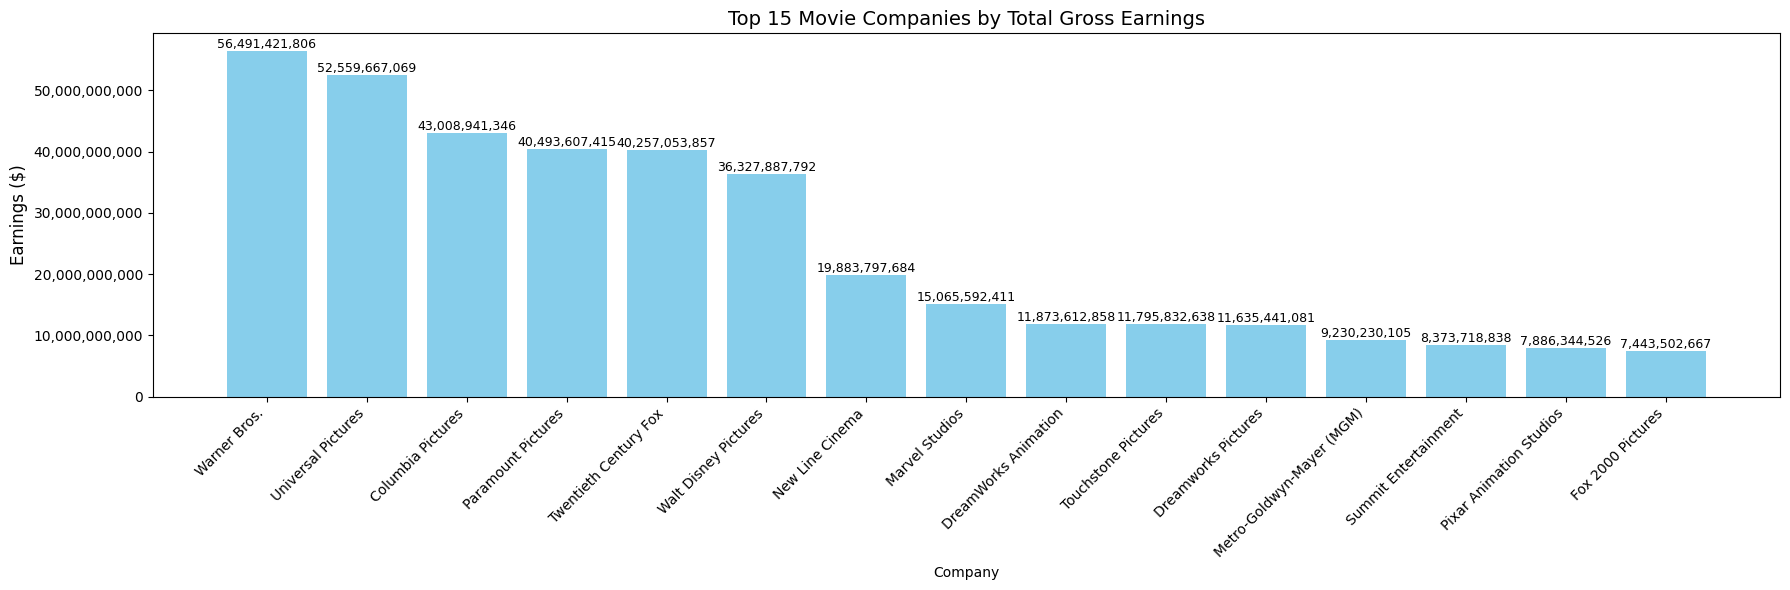

In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by 'company' and sum the 'gross' earnings
company_gross = df.groupby("company")["gross"].sum()

# Sort the companies by gross earnings (descending) and select top 15
top_companies = company_gross.sort_values(ascending=False).head(15)

# Convert values to integers (in case they are float)
top_companies = top_companies.astype(int)

# Data for the plot
companies = top_companies.index
earnings = top_companies.values

# Create a bar chart
plt.figure(figsize=(18, 6))
bars = plt.bar(companies, earnings, color='skyblue')

# Add title and labels
plt.title('Top 15 Movie Companies by Total Gross Earnings', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Earnings ($)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Format y-axis ticks with commas (e.g., 100,000,000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add earnings value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}',
             ha='center', va='bottom', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


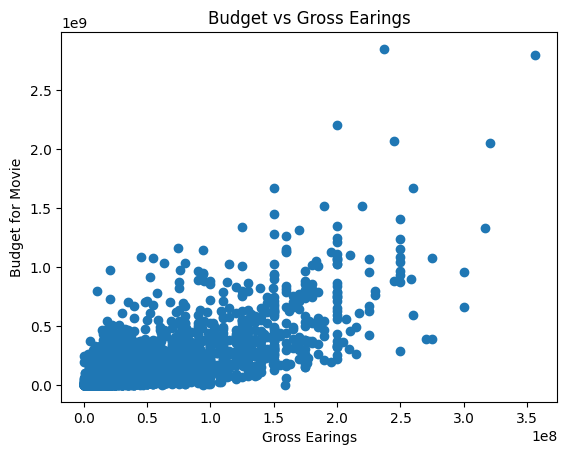

In [133]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earings')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for Movie')
plt.show()

Text(0.5, 1.0, 'Budget vs Gross Earings')

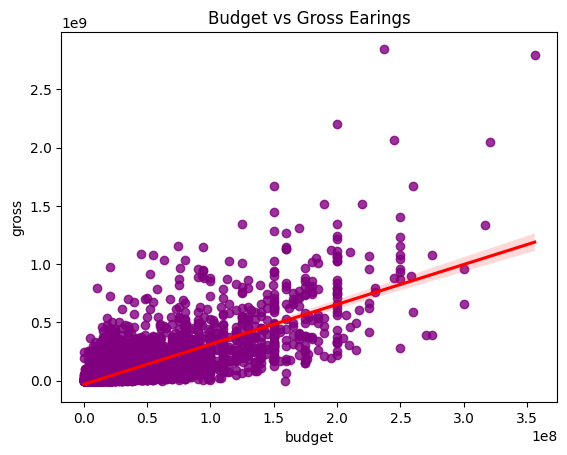

In [134]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"purple"},line_kws={"color":"red"})
plt.title('Budget vs Gross Earings')

In [135]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.288977,0.257486,0.114672
score,0.091821,1.000000,0.413096,0.058253,0.186258,0.397314
votes,0.215740,0.413096,1.000000,0.457389,0.630757,0.309541
budget,0.288977,0.058253,0.457389,1.000000,0.744926,0.272884
gross,0.257486,0.186258,0.630757,0.744926,1.000000,0.245221
runtime,0.114672,0.397314,0.309541,0.272884,0.245221,1.000000


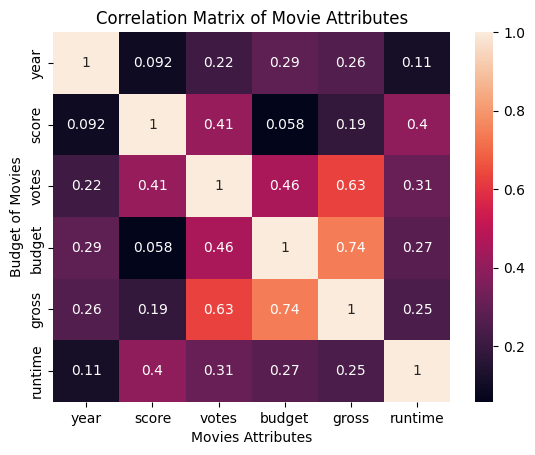

In [136]:
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix of Movie Attributes')
plt.xlabel('Movies Attributes')
plt.ylabel('Budget of Movies')
plt.show()

In [137]:
df_numeric = df
for col_name in df_numeric.columns:
    if df_numeric[col_name].dtype == 'object':
        df_numeric[col_name]=df_numeric[col_name].astype('category')
        df_numeric[col_name]=df_numeric[col_name].cat.codes

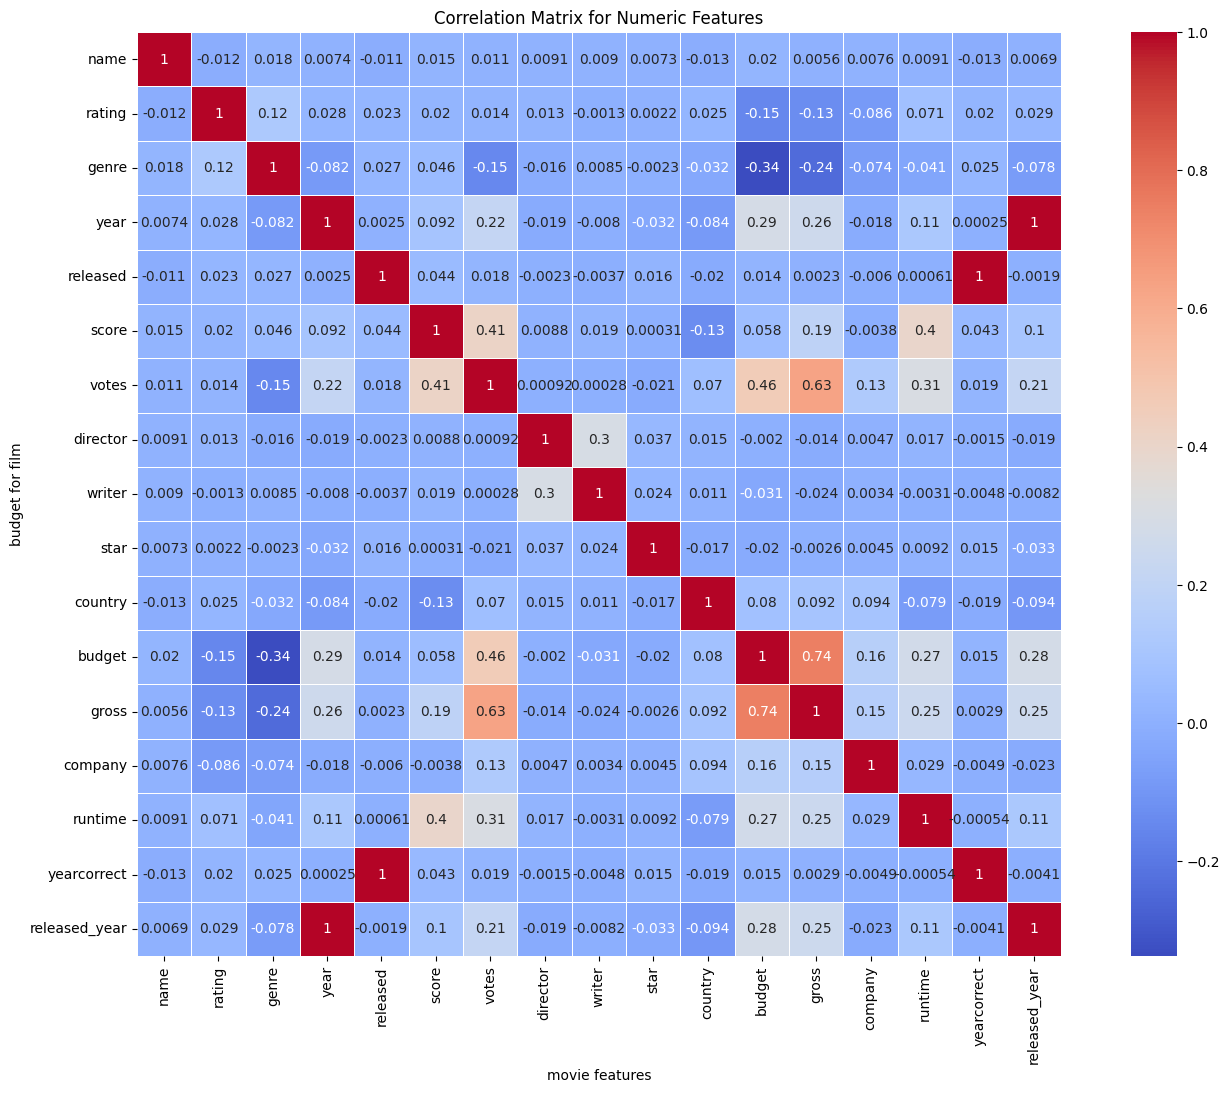

In [147]:
correlation_matrix=df_numeric.corr(numeric_only=True)
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('movie features')
plt.ylabel('budget for film')
plt.show()